## Séance 4 - manipulation des dataframes

#### Import des modules géospatials

In [60]:
import pandas as pd
import geopandas as gpd
import shapely
import folium
import contextily as cx
import matplotlib.pyplot as plt


In [61]:
print(pd.__version__)

2.1.2


#### Exercice 1. Tracer un continent, ses villes et ses fleuves

##### Examiner les 3 fichiers de données

In [62]:
data_pays = gpd.read_file("zip://./data/ne_110m_admin_0_countries.zip")
data_pays.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [63]:
rivieres = gpd.read_file("zip://./data/ne_50m_rivers_lake_centerlines.zip")
rivieres.head()

,scalerank,featurecla,name,note,min_zoom,name_alt,min_label,name_en,label,wikidataid,...,name_tr,name_vi,name_zh,ne_id,name_fa,name_he,name_uk,name_ur,name_zht,geometry
0,6,Lake Centerline,Kama,None,4.7,None,6.0,Kama,Kama,Q79082,...,Kama,Kama,卡馬河,1159125905,رود کاما,קאמה,Кама,دریائے کاما,卡馬河,"LINESTRING (51.93713 55.70107, 51.88087 55.686..."
1,6,River,Kama,None,4.7,None,6.0,Kama,Kama,Q79082,...,Kama,Kama,卡馬河,1159125917,رود کاما,קאמה,Кама,دریائے کاما,卡馬河,"LINESTRING (53.69385 58.20632, 53.67715 58.273..."
2,3,Lake Centerline,Abay,None,3.0,None,4.0,Lesser Abay,None,Q3501984,...,Abay,Abay,阿拜河,1159125319,ابی,אבאי,Абая,ابے,阿拜,"LINESTRING (37.11301 11.85499, 37.15037 11.893..."
3,3,Lake Centerline,Al Furat,None,3.0,None,4.0,Euphrates,Al Furat,Q34589,...,Fırat,Euphrates,幼发拉底河,1159125935,فرات,פרת,Євфрат,دریائے فرات,幼发拉底河,"LINESTRING (38.56119 35.86264, 38.36534 35.903..."
4,6,Lake Centerline,Alabama,None,5.0,None,6.0,Alabama,Alabama,Q558643,...,Alabama,Alabama,阿拉巴馬河,1159114961,آلاباما,נהר אלבמה,Алабама,البامہ,阿拉巴馬河,"MULTILINESTRING ((-86.52177 33.03212, -86.5209..."


In [64]:
villes = gpd.read_file("zip://./data/ne_110m_populated_places.zip")
villes.head()

,SCALERANK,NATSCALE,LABELRANK,FEATURECLA,NAME,NAMEPAR,NAMEALT,NAMEASCII,ADM0CAP,CAPIN,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry
0,8,10,3,Admin-0 capital,Vatican City,None,None,Vatican City,1,None,...,None,None,None,None,None,None,None,None,None,POINT (12.45339 41.90328)
1,7,20,0,Admin-0 capital,San Marino,None,None,San Marino,1,None,...,None,None,None,None,None,None,None,None,None,POINT (12.44177 43.93610)
2,7,20,0,Admin-0 capital,Vaduz,None,None,Vaduz,1,None,...,None,None,None,None,None,None,None,None,None,POINT (9.51667 47.13372)
3,6,30,8,Admin-0 capital alt,Lobamba,None,None,Lobamba,0,Legislative and,...,None,None,None,None,None,None,None,None,None,POINT (31.20000 -26.46667)
4,6,30,8,Admin-0 capital,Luxembourg,None,None,Luxembourg,1,None,...,None,None,None,None,None,None,None,None,None,POINT (6.13000 49.61166)


##### Sélection des pays d'un continent avec choix au hasard d'un continent

In [65]:
list_continent = data_pays['CONTINENT'].unique()
list_continent

array(['Oceania', 'Africa', 'North America', 'Asia', 'South America',
       'Europe', 'Seven seas (open ocean)', 'Antarctica'], dtype=object)

###### Choix random d'un continent

In [66]:
import random
random.seed(12345678)
continent = data_pays.index[random.randint(0, len(list_continent)-1)]
continent = list_continent[random.randint(0, len(list_continent)-1)]

continent

'Asia'

#### Exercice 2. Différentes de manière de visualiser ses données

##### Trouve l'index de chaque pays du continent

In [67]:
list_pays = data_pays.index[data_pays['CONTINENT'] == continent]
list_pays

Index([  5,   6,   8,  24,  76,  77,  79,  83,  84,  85,  86,  87,  88,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 124, 138, 139, 140, 145, 146, 147, 148, 149,
       155, 157, 158, 160, 161],
      dtype='int64')

##### Affiche les noms de pays du continent à partir de l'index

In [68]:
list_asia = [data_pays['NAME'][element] for element in list_pays]
list_asia

['Kazakhstan',
 'Uzbekistan',
 'Indonesia',
 'Timor-Leste',
 'Israel',
 'Lebanon',
 'Palestine',
 'Jordan',
 'United Arab Emirates',
 'Qatar',
 'Kuwait',
 'Iraq',
 'Oman',
 'Cambodia',
 'Thailand',
 'Laos',
 'Myanmar',
 'Vietnam',
 'North Korea',
 'South Korea',
 'Mongolia',
 'India',
 'Bangladesh',
 'Bhutan',
 'Nepal',
 'Pakistan',
 'Afghanistan',
 'Tajikistan',
 'Kyrgyzstan',
 'Turkmenistan',
 'Iran',
 'Syria',
 'Armenia',
 'Turkey',
 'Sri Lanka',
 'China',
 'Taiwan',
 'Azerbaijan',
 'Georgia',
 'Philippines',
 'Malaysia',
 'Brunei',
 'Japan',
 'Yemen',
 'Saudi Arabia',
 'N. Cyprus',
 'Cyprus']

##### Vérification du contenue du DF

In [69]:
is_asia = data_pays['NAME'].isin(list_asia)
is_asia

0      False
1      False
2      False
3      False
4      False
       ...  
172    False
173    False
174    False
175    False
176    False
Name: NAME, Length: 177, dtype: bool

##### Afficher les colonnes nom, population, PIB, et la géometrie

In [70]:
gdf_asia = data_pays.loc[is_asia, ['NAME', 'POP_EST', 'GDP_MD', 'geometry']]
gdf_asia

,NAME,POP_EST,GDP_MD,geometry
5,Kazakhstan,1.851393e+07,181665,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."
6,Uzbekistan,3.358065e+07,57921,"POLYGON ((55.96819 41.30864, 55.92892 44.99586..."
8,Indonesia,2.706256e+08,1119190,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ..."
24,Timor-Leste,1.293119e+06,2017,"POLYGON ((124.96868 -8.89279, 125.08625 -8.656..."
76,Israel,9.053300e+06,394652,"POLYGON ((35.71992 32.70919, 35.54567 32.39399..."
77,Lebanon,6.855713e+06,51991,"POLYGON ((35.82110 33.27743, 35.55280 33.26427..."
79,Palestine,4.685306e+06,16276,"POLYGON ((35.39756 31.48909, 34.92741 31.35344..."
83,Jordan,1.010169e+07,44502,"POLYGON ((35.54567 32.39399, 35.71992 32.70919..."
84,United Arab Emirates,9.770529e+06,421142,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
85,Qatar,2.832067e+06,175837,"POLYGON ((50.81011 24.75474, 50.74391 25.48242..."


##### Carte avec fond de carte grâce à la librairie contextily

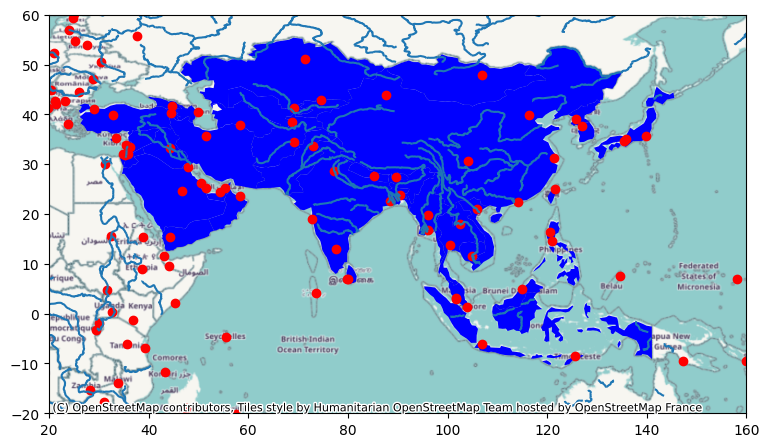

In [71]:
ax = gdf_asia.plot(color='blue', figsize=(9,9))
rivieres.plot(ax=ax)
villes.plot(ax=ax, color='red')
ax.set(xlim=(20, 160), ylim=(-20, 60))
cx.add_basemap(ax, crs='EPSG:4326')

##### Autre exemple d'affichage de matplotlib avec l'Europe

In [72]:
pays_europe = data_pays.index[data_pays['CONTINENT'] == "Europe"]
pays_europe

Index([ 18,  21,  43, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
       121, 122, 123, 125, 126, 127, 128, 129, 130, 131, 132, 133, 141, 142,
       143, 144, 150, 151, 152, 153, 170, 171, 172, 173, 174],
      dtype='int64')

In [73]:
europe = [data_pays['NAME'][element] for element in pays_europe]
europe

['Russia',
 'Norway',
 'France',
 'Sweden',
 'Belarus',
 'Ukraine',
 'Poland',
 'Austria',
 'Hungary',
 'Moldova',
 'Romania',
 'Lithuania',
 'Latvia',
 'Estonia',
 'Germany',
 'Bulgaria',
 'Greece',
 'Albania',
 'Croatia',
 'Switzerland',
 'Luxembourg',
 'Belgium',
 'Netherlands',
 'Portugal',
 'Spain',
 'Ireland',
 'Italy',
 'Denmark',
 'United Kingdom',
 'Iceland',
 'Slovenia',
 'Finland',
 'Slovakia',
 'Czechia',
 'Bosnia and Herz.',
 'North Macedonia',
 'Serbia',
 'Montenegro',
 'Kosovo']

In [74]:
is_european = data_pays['NAME'].isin(europe)
is_european

0      False
1      False
2      False
3      False
4      False
       ...  
172     True
173     True
174     True
175    False
176    False
Name: NAME, Length: 177, dtype: bool

In [75]:
gdf_europe = data_pays.loc[is_european, ['NAME', 'POP_EST', 'GDP_MD', 'geometry']]
gdf_europe

,NAME,POP_EST,GDP_MD,geometry
18,Russia,144373535.0,1699876,"MULTIPOLYGON (((178.72530 71.09880, 180.00000 ..."
21,Norway,5347896.0,403336,"MULTIPOLYGON (((15.14282 79.67431, 15.52255 80..."
43,France,67059887.0,2715518,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3..."
110,Sweden,10285453.0,530883,"POLYGON ((11.02737 58.85615, 11.46827 59.43239..."
111,Belarus,9466856.0,63080,"POLYGON ((28.17671 56.16913, 29.22951 55.91834..."
112,Ukraine,44385155.0,153781,"POLYGON ((31.78599 52.10168, 32.15944 52.06125..."
113,Poland,37970874.0,595858,"POLYGON ((23.48413 53.91250, 23.52754 53.47012..."
114,Austria,8877067.0,445075,"POLYGON ((16.97967 48.12350, 16.90375 47.71487..."
115,Hungary,9769949.0,163469,"POLYGON ((22.08561 48.42226, 22.64082 48.15024..."
116,Moldova,2657637.0,11968,"POLYGON ((26.61934 48.22073, 26.85782 48.36821..."


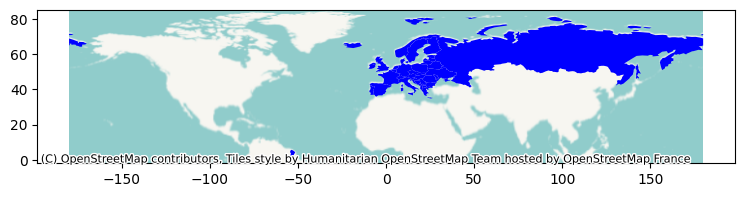

In [76]:
bx = gdf_europe.plot(color='blue', figsize=(9,9))
cx.add_basemap(bx, crs='EPSG:4326')

##### Affiche une carte chloroplèthe avec plot

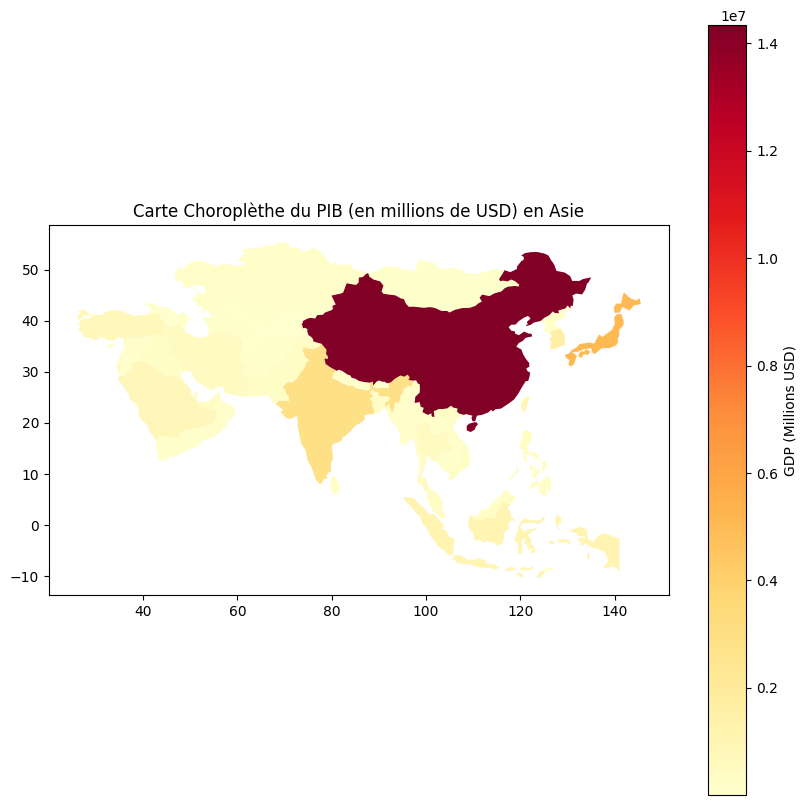

In [77]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf_asia.plot(column='GDP_MD', cmap='YlOrRd', legend=True, ax=ax, legend_kwds={'label': "GDP (Millions USD)"})
ax.set_title('Carte Choroplèthe du PIB (en millions de USD) en Asie')

# Affichez la carte
plt.show()

##### Carte chloropleth avec folium sur l'Asie + Tooltip

In [78]:
import folium
import geopandas as gpd

m = folium.Map(location=[20, 100], zoom_start=2)

gdf_asia_json = gdf_asia.to_crs(epsg='4326').to_json()

# Ajoutez les données choroplèthes à la carte
choropleth = folium.Choropleth(
    geo_data=gdf_asia_json,
    name='choropleth',
    data=gdf_asia,
    columns=['NAME', 'GDP_MD'],
    key_on='feature.properties.NAME',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='GDP (Millions USD)',
).add_to(m)

style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}

highlight_function = lambda x: {'fillColor': '#000000', 
                                    'color':'#000000', 
                                    'fillOpacity': 0.50, 
                                    'weight': 0.1}


for idx, row in gdf_asia.iterrows():
    feature = {
        "type": "Feature",
        "geometry": row["geometry"].__geo_interface__,
        "properties": {
            "NAME": row['NAME'],
            "GDP_MD": row['GDP_MD'],
        }
    }
    geojson_feature = folium.GeoJson(
        data=feature,   
        style_function=lambda x: {'fillColor': 'transparent', 'weight':0},
        highlight_function=lambda x: {'weight': 3, 'color': 'black'},
        tooltip=folium.GeoJsonTooltip(
            fields=["NAME", "GDP_MD"],
            aliases=["Pays:", 
                     "PIB:"],
            style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;"),
        )
    )
    geojson_feature.add_to(m)


In [79]:
m

#### Exercice 3. Jointures spatiales

##### Visualisation des données

In [84]:
bike_stations = gpd.read_file('./data/data Paris-20231029/paris_bike_stations.geojson')
bike_stations

,name,bike_stands,available_bikes,geometry
0,14002 - RASPAIL QUINET,44,4,POINT (2.32956 48.83920)
1,20503 - COURS DE VINCENNES PYRÉNÉES,21,3,POINT (2.40591 48.84772)
2,20011 - PYRÉNÉES-DAGORNO,21,0,POINT (2.40517 48.85550)
3,31008 - VINCENNES (MONTREUIL),56,0,POINT (2.43737 48.85770)
4,43006 - MINIMES (VINCENNES),28,27,POINT (2.43079 48.84149)
...,...,...,...,...
1221,12011 - CHARENTON,36,35,POINT (2.38258 48.84487)
1222,13110 - MOULIN DE LA POINTE,22,4,POINT (2.35635 48.82104)
1223,07006 - QUAI VOLTAIRE,32,25,POINT (2.33142 48.85894)
1224,21311 - GAMBETTA (ISSY LES MOULINEAUX),55,47,POINT (2.27855 48.82747)


In [123]:
district_paris = gpd.read_file('./data/data Paris-20231029/paris_districts.geojson')
district_paris

,id,district_name,population,geometry
0,1,St-Germain-l'Auxerrois,1672,"POLYGON ((2.34459 48.85405, 2.34459 48.85405, ..."
1,2,Halles,8984,"POLYGON ((2.34937 48.86058, 2.34822 48.85852, ..."
2,3,Palais-Royal,3195,"POLYGON ((2.33947 48.86214, 2.33912 48.86148, ..."
3,4,Place-Vendôme,3044,"POLYGON ((2.33194 48.86491, 2.33135 48.86399, ..."
4,5,Gaillon,1345,"POLYGON ((2.33632 48.86797, 2.33587 48.86700, ..."
...,...,...,...,...
75,76,Combat,38988,"POLYGON ((2.38834 48.88057, 2.38950 48.87955, ..."
76,77,Belleville,35773,"POLYGON ((2.38323 48.86710, 2.38314 48.86708, ..."
77,78,Saint-Fargeau,42087,"POLYGON ((2.41381 48.87081, 2.41383 48.87066, ..."
78,79,Père-Lachaise,42332,"POLYGON ((2.39536 48.85670, 2.39444 48.85657, ..."


In [124]:
district_station = gpd.sjoin(bike_stations, district_paris, how='inner', predicate='within')
district_station

,name,bike_stands,available_bikes,geometry,index_right,id,district_name,population
0,14002 - RASPAIL QUINET,44,4,POINT (2.32956 48.83920),52,53,Montparnasse,18570
143,14112 - FAUBOURG SAINT JACQUES CASSINI,16,0,POINT (2.33798 48.83587),52,53,Montparnasse,18570
293,14033 - DAGUERRE GASSENDI,38,1,POINT (2.32829 48.83568),52,53,Montparnasse,18570
346,14006 - SAINT JACQUES TOMBE ISSOIRE,22,0,POINT (2.33693 48.83319),52,53,Montparnasse,18570
429,14111 - DENFERT-ROCHEREAU CASSINI,24,8,POINT (2.33598 48.83755),52,53,Montparnasse,18570
...,...,...,...,...,...,...,...,...
1151,06014 - PONT DE LODI DAUPHINE,26,14,POINT (2.33995 48.85530),20,21,Monnaie,6185
1188,06031 - SAINT MICHEL SARRAZIN,34,33,POINT (2.34220 48.85083),20,21,Monnaie,6185
763,03003 - TURENNE BRETAGNE,32,11,POINT (2.36495 48.86213),9,10,Enfants-Rouges,8562
987,03004 - REPUBLIQUE 23,18,12,POINT (2.36351 48.86707),9,10,Enfants-Rouges,8562


In [125]:
tree_paris = gpd.read_file('./data/les-arbres.geojson')
tree_paris.head()

,idbase,typeemplacement,domanialite,arrondissement,complementadresse,numero,adresse,idemplacement,libellefrancais,genre,espece,varieteoucultivar,circonferenceencm,hauteurenm,stadedeveloppement,remarquable,geometry
0,144368,Arbre,CIMETIERE,PARIS 18E ARRDT,None,None,CIMETIERE DE MONTMARTRE / AVENUE DE LA CROIX /...,A02500028011,Erable,Acer,pseudoplatanus,None,130,16,Adulte,NON,POINT (2.33083 48.88655)
1,151279,Arbre,CIMETIERE,SEINE-SAINT-DENIS,None,None,CIMETIERE DE PANTIN / DIV 88,D00000088007,Arbre à soie,Albizia,julibrissin,''Ombrella'',50,5,None,None,POINT (2.41612 48.90864)
2,277099,Arbre,Alignement,PARIS 7E ARRDT,51 bis,None,AVENUE DE SEGUR,000701019,Platane,Platanus,x hispanica,None,130,15,Adulte,NON,POINT (2.30839 48.84998)
3,209534,Arbre,Alignement,PARIS 4E ARRDT,None,None,RUE AGRIPPA D AUBIGNE,000202011,Marronnier,Aesculus,hippocastanum,''Baumannii'',195,15,Adulte,NON,POINT (2.36247 48.85010)
4,210180,Arbre,Alignement,PARIS 19E ARRDT,None,None,BOULEVARD DE LA VILLETTE,000804024,Sophora,Styphnolobium,japonicum,None,110,12,Adulte,NON,POINT (2.37099 48.87754)


##### Jointure spatiale des arbres dans le quartier parisien

In [126]:
tree_district = gpd.sjoin(tree_paris, district_paris,how='inner', predicate='within')
tree_district.head()

,idbase,typeemplacement,domanialite,arrondissement,complementadresse,numero,adresse,idemplacement,libellefrancais,genre,...,varieteoucultivar,circonferenceencm,hauteurenm,stadedeveloppement,remarquable,geometry,index_right,id,district_name,population
0,144368,Arbre,CIMETIERE,PARIS 18E ARRDT,None,None,CIMETIERE DE MONTMARTRE / AVENUE DE LA CROIX /...,A02500028011,Erable,Acer,...,None,130,16,Adulte,NON,POINT (2.33083 48.88655),68,69,Grandes-Carrières,67152
64,119939,Arbre,Jardin,PARIS 18E ARRDT,None,None,SQUARE DE LEON SERPOLLET,00000058,Cerisier à fleurs,Prunus,...,''Kanzan'',95,6,Jeune (arbre)Adulte,NON,POINT (2.33928 48.89208),68,69,Grandes-Carrières,67152
160,292395,Arbre,Alignement,PARIS 18E ARRDT,19,None,RUE VAUVENARGUES,000301003,Peuplier,Populus,...,''Italica'',116,14,Adulte,NON,POINT (2.33354 48.89312),68,69,Grandes-Carrières,67152
214,285220,Arbre,Alignement,PARIS 18E ARRDT,None,None,RUE CAULAINCOURT,000501060,Sophora,Styphnolobium,...,None,102,16,Mature,NON,POINT (2.33612 48.88958),68,69,Grandes-Carrières,67152
219,2034860,Arbre,Jardin,PARIS 18E ARRDT,Le verger,None,SQUARE DE LA RUE RENE BINET / 42 RUE RENE BINET,000407001,Poirier à fruits,Pyrus,...,''Beurré Hardy'',0,0,Jeune (arbre),NON,POINT (2.33874 48.89989),68,69,Grandes-Carrières,67152


In [127]:
colum = [col for col in tree_district.columns]
colum

['idbase',
 'typeemplacement',
 'domanialite',
 'arrondissement',
 'complementadresse',
 'numero',
 'adresse',
 'idemplacement',
 'libellefrancais',
 'genre',
 'espece',
 'varieteoucultivar',
 'circonferenceencm',
 'hauteurenm',
 'stadedeveloppement',
 'remarquable',
 'geometry',
 'index_right',
 'id',
 'district_name',
 'population']

In [128]:
tree_district['district_name']

0         Grandes-Carrières
64        Grandes-Carrières
160       Grandes-Carrières
214       Grandes-Carrières
219       Grandes-Carrières
                ...        
195769        Place-Vendôme
197134        Place-Vendôme
198934        Place-Vendôme
202779        Place-Vendôme
204094        Place-Vendôme
Name: district_name, Length: 181179, dtype: object

##### Group by de la colonne "district_name" et créer un nouveau champs nombre d'arbres par quartier

In [132]:
tree_arr = tree_district.groupby('district_name').size().reset_index(name='Nombre_Arbres')
tree_arr

,district_name,Nombre_Arbres
0,Amérique,4370
1,Archives,256
2,Arsenal,1100
3,Arts-et-Metiers,392
4,Auteuil,7799
...,...,...
75,St-Germain-l'Auxerrois,661
76,Ternes,2655
77,Val-de-Grace,387
78,Villette,2612


##### Fusion des données dans district_paris

In [133]:
merging_tree = district_paris.merge(tree_arr, on='district_name', how='left')
merging_tree


,id,district_name,population,geometry,Nombre_Arbres
0,1,St-Germain-l'Auxerrois,1672,"POLYGON ((2.34459 48.85405, 2.34459 48.85405, ...",661
1,2,Halles,8984,"POLYGON ((2.34937 48.86058, 2.34822 48.85852, ...",820
2,3,Palais-Royal,3195,"POLYGON ((2.33947 48.86214, 2.33912 48.86148, ...",42
3,4,Place-Vendôme,3044,"POLYGON ((2.33194 48.86491, 2.33135 48.86399, ...",92
4,5,Gaillon,1345,"POLYGON ((2.33632 48.86797, 2.33587 48.86700, ...",109
...,...,...,...,...,...
75,76,Combat,38988,"POLYGON ((2.38834 48.88057, 2.38950 48.87955, ...",4157
76,77,Belleville,35773,"POLYGON ((2.38323 48.86710, 2.38314 48.86708, ...",1494
77,78,Saint-Fargeau,42087,"POLYGON ((2.41381 48.87081, 2.41383 48.87066, ...",3128
78,79,Père-Lachaise,42332,"POLYGON ((2.39536 48.85670, 2.39444 48.85657, ...",6505


##### Affichage d'une carte de densité des arbres selon quartiers de Paris

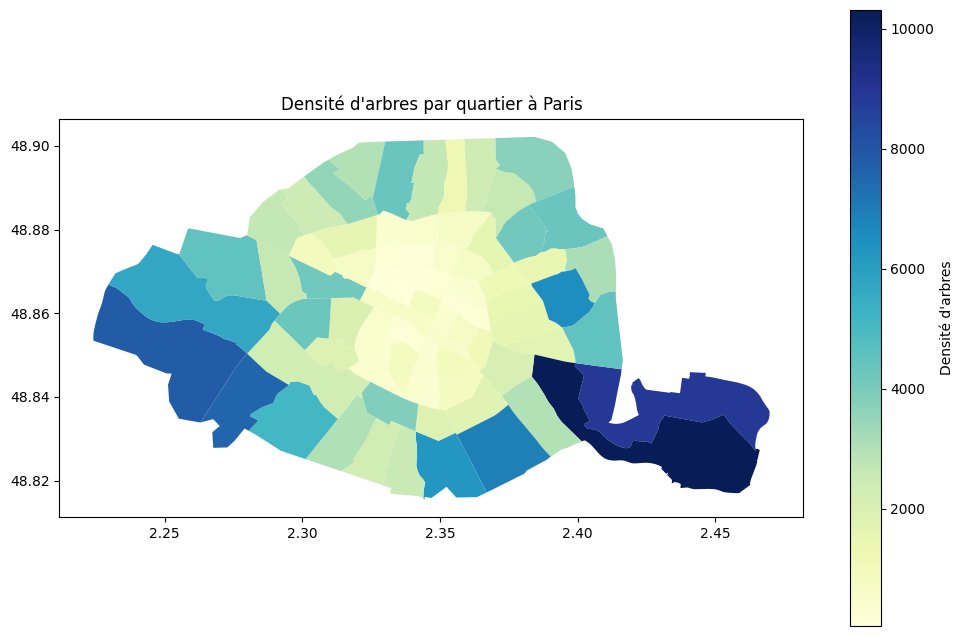

In [136]:
ax = merging_tree.plot(column='Nombre_Arbres', cmap='YlGnBu', figsize=(12, 8), legend=True, legend_kwds={'label': "Densité d'arbres"})
plt.title("Densité d'arbres par quartier à Paris")
plt.show()

##### Lecture de la couche d'occupation du sol au format zip

In [137]:
land_use = gpd.read_file("zip://./data/data Paris-20231029/paris_land_use.zip")
land_use

,class,geometry
0,Water bodies,"POLYGON ((3751386.281 2890064.323, 3751395.345..."
1,Roads and associated land,"POLYGON ((3751390.345 2886000.000, 3751390.345..."
2,Roads and associated land,"POLYGON ((3751390.345 2886898.192, 3751390.370..."
3,Roads and associated land,"POLYGON ((3751390.345 2887500.000, 3751390.345..."
4,Roads and associated land,"POLYGON ((3751390.345 2888647.357, 3751390.370..."
...,...,...
3238,Green urban areas,"POLYGON ((3762500.000 2887018.698, 3762458.012..."
3239,Water bodies,"POLYGON ((3762500.000 2892386.959, 3762470.299..."
3240,Continuous Urban Fabric,"POLYGON ((3762500.000 2891470.236, 3762467.383..."
3241,Continuous Urban Fabric,"POLYGON ((3762500.000 2892463.878, 3762444.008..."


##### Visualisation de la couche

<Axes: >

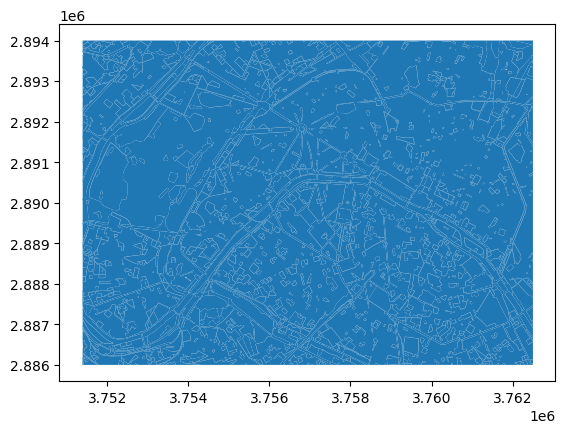

In [140]:
land_use.plot()

##### Intersection de la couche précédente au quartier de Paris

<Axes: >

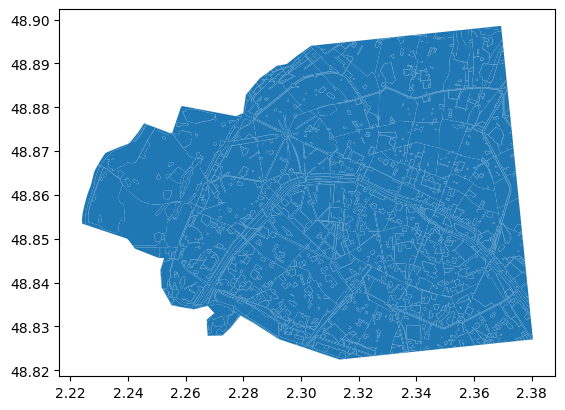

In [144]:
land_use = land_use.to_crs(district_paris.crs)
intersect_layer = gpd.overlay(district_paris, land_use, how='intersection')
intersect_layer.plot()

##### Cacul la superficie

In [146]:
superficie_intersection = intersect_layer.area
intersect_layer['Superficie'] = superficie_intersection

intersect_layer

C:\Users\User\AppData\Local\Temp\ipykernel_26708\2199768010.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  superficie_intersection = intersect_layer.area


,id,district_name,population,class,geometry,Superficie
0,1,St-Germain-l'Auxerrois,1672,Continuous Urban Fabric,"MULTIPOLYGON (((2.34817 48.85853, 2.34818 48.8...",6.085912e-06
1,2,Halles,8984,Continuous Urban Fabric,"POLYGON ((2.34824 48.85855, 2.34820 48.85857, ...",3.481338e-05
2,3,Palais-Royal,3195,Continuous Urban Fabric,"MULTIPOLYGON (((2.34085 48.86583, 2.34085 48.8...",1.886701e-05
3,4,Place-Vendôme,3044,Continuous Urban Fabric,"POLYGON ((2.33138 48.86403, 2.33136 48.86404, ...",2.861105e-05
4,5,Gaillon,1345,Continuous Urban Fabric,"POLYGON ((2.33587 48.86700, 2.33373 48.86750, ...",1.972317e-05
...,...,...,...,...,...,...
2974,73,Villette,53650,Continuous Urban Fabric,"POLYGON ((2.37222 48.87998, 2.37127 48.87898, ...",6.700123e-06
2975,76,Combat,38988,Continuous Urban Fabric,"POLYGON ((2.37071 48.87839, 2.37079 48.87848, ...",3.787152e-06
2976,73,Villette,53650,Continuous Urban Fabric,"POLYGON ((2.37081 48.88448, 2.37080 48.88452, ...",1.580176e-06
2977,76,Combat,38988,Continuous Urban Fabric,"POLYGON ((2.37108 48.87745, 2.37108 48.87745, ...",4.711834e-21
